**GEREKLİ BAĞLILIKLARIN YÜKLENMESİ**


In [ ]:
!pip install langdetect
!pip install nltk
import nltk
nltk.download('stopwords')
!pip install openpyxl
!pip install --upgrade sympy
!pip install --upgrade transformers
!pip install pandas scikit-learn openpyxl nltk
!pip install transformers torch pandas scikit-learn openpyxl
!pip install googletrans==4.0.0-rc1
!pip install transformers torch pandas tqdm
!pip install transformers torch pandas tqdm scikit-learn matplotlib seaborn openpyxl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=c8fd0f9150ed3a5129aad673781fb546fb9b65707a6bd8b2ce967edb165b46de
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 65.0 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 57.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.1
    Uninstalling transformers-4.47.1:
      Successfully uninstalled transformers-4.47.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 41.1 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy

**KÜTÜPHANELERİN YÜKLENMESİ**

In [ ]:
import pandas as pd
import zipfile
import os
import csv
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import seaborn as sns
import numpy as np
from torch.utils.data import Dataset, DataLoader

from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_fscore_support
from datetime import datetime
from typing import Dict, List
from collections import defaultdict
from torch.utils.data import Dataset, DataLoader
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW, get_linear_schedule_with_warmup, pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
nltk.download('stopwords', quiet=True)

True

**KEŞİFSEL VERİ ANALİZİ VE DÜZENLENMESİ**


In [ ]:

# 1. Zip dosyasını yüklemek için Colab'ın dosya yükleme aracını kullanın
from google.colab import files
uploaded = files.upload()

In [ ]:

# 2. Zip dosyasını çıkarın
zip_filename = list(uploaded.keys())[0]  # Yüklenen zip dosyasının adı
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')  # Dosyaları 'extracted_files' klasörüne çıkarır

# 3. Çıkarılan dosyaları listeleyin
extracted_files_path = 'extracted_files'
csv_files = [f for f in os.listdir(extracted_files_path) if f.endswith('.csv')]

# 4. Her dosyanın sütun adlarını görüntüle
print("CSV Dosyalarının Sütun Adları:")
columns_dict = {}
for file in csv_files:
    file_path = os.path.join(extracted_files_path, file)
    try:
        df = pd.read_csv(file_path, nrows=0)  # Sadece sütun isimlerini okumak için
        columns_dict[file] = df.columns.tolist()
        print(f"{file}: {df.columns.tolist()}")
    except Exception as e:
        print(f"{file}: Okuma sırasında hata oluştu ({e})")

In [ ]:
# 4. Sadece `Date`, `Tweet` ve `username` sütunlarını al ve yeni bir CSV dosyasına kaydet
columns_to_keep = ['Date', 'Tweet', 'username']  # Gerekli sütunlar
filtered_data = []

for file in csv_files:
    file_path = os.path.join(extracted_files_path, file)
    try:
        df = pd.read_csv(file_path)
        available_columns = [col for col in columns_to_keep if col in df.columns]  # Mevcut sütunları kontrol et
        if available_columns:
            filtered_df = df[available_columns].dropna()  # Sadece mevcut sütunları al ve boş satırları çıkar
            filtered_data.append(filtered_df)
            print(f"{file}: {len(filtered_df)} satır alındı.")
        else:
            print(f"{file}: Gerekli sütunlar bulunamadı.")
    except Exception as e:
        print(f"{file}: Okuma sırasında hata oluştu ({e})")

# 5. Tüm verileri birleştir ve yeni bir CSV dosyasına kaydet
if filtered_data:
    all_filtered_data = pd.concat(filtered_data, ignore_index=True)
    all_filtered_data.to_csv('filtered_data2.csv', index=False)
    print("\nSeçilen sütunlar 'filtered_data2.csv' dosyasına kaydedildi.")
else:
    print("\nHiçbir dosyada gerekli sütunlar bulunamadı.")


depremGun1tr.csv: 504325 satır alındı.

Seçilen sütunlar 'filtered_data2.csv' dosyasına kaydedildi.


In [ ]:
# 1. Dosya isimlerini tanımlayın
file1 = 'filtered_data2.csv'  # İlk CSV dosyası
file2 = 'twitter.csv'         # İkinci CSV dosyası

# 2. CSV dosyalarını okuyun
try:
    df1 = pd.read_csv(file1, on_bad_lines='skip', engine='python', encoding='utf-8')
    print(f"{file1} başarıyla okundu.")
except Exception as e:
    print(f"{file1} dosyasını okurken hata oluştu: {e}")
    df1 = pd.DataFrame()  # Hata durumunda boş bir DataFrame oluştur

try:
    df2 = pd.read_csv(file2, on_bad_lines='skip', engine='python', encoding='utf-8')
    print(f"{file2} başarıyla okundu.")
except Exception as e:
    print(f"{file2} dosyasını okurken hata oluştu: {e}")
    df2 = pd.DataFrame()  # Hata durumunda boş bir DataFrame oluştur

# 3. Gerekli sütunları kontrol edin
columns_to_keep = ['Date', 'Tweet', 'username']
available_columns1 = [col for col in columns_to_keep if col in df1.columns]
available_columns2 = [col for col in columns_to_keep if col in df2.columns]

# 4. Ortak sütunları alın ve birleştirin
if set(available_columns1) == set(available_columns2):
    combined_df = pd.concat([df1[available_columns1], df2[available_columns2]], ignore_index=True)
    print("Dosyalar başarıyla birleştirildi.")
else:
    print("Sütun isimleri uyuşmuyor, lütfen sütunları kontrol edin.")
    combined_df = None

# 5. İlk 10 tweeti görüntüleyin
if combined_df is not None:
    print("\nBirleştirilmiş verilerin ilk 10 satırı:")
    print(combined_df.head(10))

    # Yeni bir CSV dosyasına kaydedin
    combined_df.to_csv('combined_data.csv', index=False)
    print("\nBirleştirilmiş veriler 'combined_data.csv' dosyasına kaydedildi.")
else:
    print("\nBirleştirme işlemi başarısız.")


filtered_data2.csv başarıyla okundu.
twitter.csv başarıyla okundu.
Sütun isimleri uyuşmuyor, lütfen sütunları kontrol edin.

Birleştirme işlemi başarısız.


In [ ]:
# Sütun isimlerini görüntüleyin
print("filtered_data2.csv sütun isimleri:", df1.columns)
print("twitter.csv sütun isimleri:", df2.columns)


filtered_data2.csv sütun isimleri: Index(['Date', 'Tweet', 'username'], dtype='object')
twitter.csv sütun isimleri: Index(['Tarih', 'Kullanıcı', 'Tweet', 'Beğeni', 'Retweet'], dtype='object')


In [ ]:
# CSV dosyasını yükleme
file_path = "tweets_without_duplicates1.csv"  # Dosya yolunu doğru girin
data = pd.read_csv(file_path, on_bad_lines='skip', engine='python', encoding='ISO-8859-1')
# encoding='ISO-8859-1' veya 'latin1' veya 'cp1252' olarak değiştirildi

# Satır sayısını öğrenme
print(f"Satır sayısı: {len(data)}")

Satır sayısı: 529436


In [ ]:
# twitter.csv sütun isimlerini uyumlu hale getirelim
df2.rename(columns={'Tarih': 'Date', 'Kullanıcı': 'username'}, inplace=True)

# Şimdi her iki DataFrame'de de 'Date', 'Tweet' ve 'username' sütunları olacak


In [ ]:
# 3. Gerekli sütunları kontrol edin
columns_to_keep = ['Date', 'Tweet', 'username']
available_columns1 = [col for col in columns_to_keep if col in df1.columns]
available_columns2 = [col for col in columns_to_keep if col in df2.columns]

# 4. Ortak sütunları alın ve birleştirin
if set(available_columns1) == set(available_columns2):
    combined_df = pd.concat([df1[available_columns1], df2[available_columns2]], ignore_index=True)
    print("Dosyalar başarıyla birleştirildi.")
else:
    print("Sütun isimleri uyuşmuyor, lütfen sütunları kontrol edin.")
    combined_df = None


Dosyalar başarıyla birleştirildi.


In [ ]:
# 5. İlk 10 tweeti görüntüleyin
if combined_df is not None:
    print("\nBirleştirilmiş verilerin ilk 10 satırı:")
    print(combined_df.head(10))

    # Yeni bir CSV dosyasına kaydedin
    combined_df.to_csv('combined_data.csv', index=False)
    print("\nBirleştirilmiş veriler 'combined_data.csv' dosyasına kaydedildi.")
else:
    print("\nBirleştirme işlemi başarısız.")



Birleştirilmiş verilerin ilk 10 satırı:
                        Date  \
0  2023-02-06 23:59:59+00:00   
1  2023-02-06 23:59:58+00:00   
2  2023-02-06 23:59:58+00:00   
3  2023-02-06 23:59:57+00:00   
4  2023-02-06 23:59:57+00:00   
5  2023-02-06 23:59:56+00:00   
6  2023-02-06 23:59:56+00:00   
7  2023-02-06 23:59:55+00:00   
8  2023-02-06 23:59:55+00:00   
9  2023-02-06 23:59:55+00:00   

                                               Tweet         username  
0  İstanbulda gök gürültüsü başladı Allah’ım sen ...      Brk34587273  
1   Bu gece dualarımız enkaz altında kalanlar içi...   SerbestSabuncu  
2  Ülkede afet var fırsatçılar iş başında..!Ülked...  zeynepkacar2504  
3  Askerlerimiz kışladan çıksın  Yollar KAPALI  z...       aligsderya  
4  Gün suçlu arama; sağa veya sola çamur atma, ik...         hamzacak  
5                        Keşke, Keşkee, Keşkeee 🙏🙄            Haruun_  
6                                         YAYALIM           sakinoled  
7  Adıyaman yardım bekliyor no

**VERİLERİN NORMALİZASYON İŞLEMİNDEN GEÇİRİLMESİ**

In [ ]:
# Dosyanın yolunu belirtin
input_file = 'combined_data.csv'  # Girdi dosyasının yolu
output_file = 'normalized_tweets.csv'  # Çıktı dosyasının adı

# CSV dosyasını oku
df = pd.read_csv(input_file, encoding='utf-8')

# Tweetleri temizleme fonksiyonu
def clean_tweet(tweet):
    if isinstance(tweet, str):  # Yalnızca metin verileriyle işlem yap
        # URL'leri kaldır
        tweet = re.sub(r'http\S+', '', tweet)
        # @mention'ları kaldır
        tweet = re.sub(r'@\S+', '', tweet)
        # #hashtag'leri kaldır
        tweet = re.sub(r'#\S+', '', tweet)
        # Özel karakterleri kaldır
        tweet = re.sub(r'[^\w\s]', '', tweet)
        # Fazla boşlukları kaldır
        tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

# Verileri temizle
df['Tweet'] = df['Tweet'].apply(clean_tweet)

# Gerekli sütunları seç
columns_to_keep = ['Date', 'Tweet', 'username']
df_filtered = df[columns_to_keep]

# Verileri yeni bir CSV dosyasına kaydet
df_filtered.to_csv(output_file, index=False, encoding='utf-8')

print(f"Veriler {output_file} dosyasına başarıyla yazıldı.")


Veriler normalized_tweets.csv dosyasına başarıyla yazıldı.


In [ ]:

# Dosyanın yolunu belirtin
input_file = 'normalized_tweets.csv'  # Normalizasyon yapılmış verilerin kaydedildiği dosya

# CSV dosyasını oku
df = pd.read_csv(input_file, encoding='utf-8')

# İlk 100 tweeti görüntüle
first_100_tweets = df.head(100)
print(first_100_tweets[['Date', 'username', 'Tweet']])


                         Date         username  \
0   2023-02-06 23:59:59+00:00      Brk34587273   
1   2023-02-06 23:59:58+00:00   SerbestSabuncu   
2   2023-02-06 23:59:58+00:00  zeynepkacar2504   
3   2023-02-06 23:59:57+00:00       aligsderya   
4   2023-02-06 23:59:57+00:00         hamzacak   
..                        ...              ...   
95  2023-02-06 23:59:16+00:00    AliKutayGler1   
96  2023-02-06 23:59:16+00:00   _sonhavadiscom   
97  2023-02-06 23:59:15+00:00  AndersonT4lisca   
98  2023-02-06 23:59:15+00:00     WHATAFEEL1NG   
99  2023-02-06 23:59:15+00:00         siimayyy   

                                                Tweet  
0   İstanbulda gök gürültüsü başladı Allahım sen koru  
1   Bu gece dualarımız enkaz altında kalanlar için...  
2   Ülkede afet var fırsatçılar iş başındaÜlkede y...  
3   Askerlerimiz kışladan çıksın Yollar KAPALI zam...  
4   Gün suçlu arama sağa veya sola çamur atma ikti...  
..                                                ...  
95  muh

**TÜRKÇE TWEETLERİN AYRIŞTIRILMASI**

In [ ]:
def setup_language_detector(device_id=None):
    """
    Dil algılama modelini hazırlar ve en uygun cihazı seçer
    """
    if device_id is None:
        device_id = 0 if torch.cuda.is_available() else -1

    print(f"Kullanılan cihaz: {'GPU' if device_id >= 0 else 'CPU'}")

    return pipeline(
        "text-classification",
        model="papluca/xlm-roberta-base-language-detection",
        device=device_id,
        batch_size=32  # Daha büyük batch boyutu
    )

def process_tweets(input_file, output_file, lang_identifier, batch_size=32):
    """
    Tweetleri işler ve Türkçe olanları filtreler
    """
    try:
        # DataFrame ile okuma (daha hızlı ve verimli)
        print("Veri okunuyor...")
        df = pd.read_csv(input_file, encoding='utf-8')
        total_tweets = len(df)
        print(f"Toplam {total_tweets} tweet bulundu.")

        # Boş tweet kontrolü ve temizlik
        df = df.dropna(subset=[df.columns[1]])  # 2. sütundaki boş değerleri temizle
        print(f"Boş tweetler temizlendi. Kalan tweet sayısı: {len(df)}")

        # Tweetleri işle
        turkce_tweets = []
        tweet_texts = df[df.columns[1]].tolist()  # 2. sütundaki tweetler

        print("Dil tespiti yapılıyor...")
        for i in tqdm(range(0, len(tweet_texts), batch_size)):
            batch = tweet_texts[i:i + batch_size]
            try:
                results = lang_identifier(batch)

                # Türkçe tweetleri seç
                for idx, result in enumerate(results):
                    if result['label'] == 'tr':
                        original_idx = i + idx
                        turkce_tweets.append(df.iloc[original_idx])

            except Exception as e:
                print(f"Batch işleme hatası (index {i}): {e}")
                continue

        # Sonuçları DataFrame'e dönüştür ve kaydet
        turkce_df = pd.DataFrame(turkce_tweets)
        turkce_df.to_csv(output_file, index=False, encoding='utf-8')

        print("\nİşlem tamamlandı:")
        print(f"Toplam tweet: {total_tweets}")
        print(f"Türkçe tweet: {len(turkce_tweets)}")
        print(f"Sonuçlar {output_file} dosyasına kaydedildi.")

    except Exception as e:
        print(f"Genel hata: {e}")
        raise

def main():
    # Yapılandırma
    config = {
        'input_file': 'normalized_tweets.csv',
        'output_file': 'turkce_tweets1.csv',
        'batch_size': 32
    }

    try:
        # CUDA bellek optimizasyonu
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        # Dil algılama modelini hazırla
        lang_identifier = setup_language_detector()

        # Tweetleri işle
        process_tweets(
            config['input_file'],
            config['output_file'],
            lang_identifier,
            config['batch_size']
        )

    except KeyboardInterrupt:
        print("\nİşlem kullanıcı tarafından durduruldu.")
    except Exception as e:
        print(f"Beklenmeyen hata: {e}")
    finally:
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

if __name__ == "__main__":
    main()

Kullanılan cihaz: GPU


Device set to use cuda:0


Veri okunuyor...
Toplam 506493 tweet bulundu.
Boş tweetler temizlendi. Kalan tweet sayısı: 506470
Dil tespiti yapılıyor...


100%|██████████| 15828/15828 [34:27<00:00,  7.65it/s]



İşlem tamamlandı:
Toplam tweet: 506493
Türkçe tweet: 504056
Sonuçlar turkce_tweets1.csv dosyasına kaydedildi.


**TEKRAR EDEN TWEETLERİN KALDIRILMASI**

In [ ]:

# CSV dosyasını okuma
df = pd.read_csv('turkce_tweets1.csv')
print("Sütun isimleri:")
print(df.columns)

# Tekrar eden tweetlerin detaylı analizi
duplicate_tweet_counts = df[df.duplicated(subset=['Tweet'], keep=False)]\
    .groupby('Tweet').size().reset_index(name='duplicate_count')

# Tekrar sayısına göre azalan sıralama
duplicate_tweet_counts = duplicate_tweet_counts.sort_values('duplicate_count', ascending=False)

# Sadece 2'den fazla tekrar eden tweetleri gösterme
frequent_duplicates = duplicate_tweet_counts[duplicate_tweet_counts['duplicate_count'] > 2]

print("Sık tekrar eden tweetler:")
print(frequent_duplicates)

# Tekrar eden tweetleri temizleme (ilk örnekleri tutma)
df_cleaned = df.drop_duplicates(subset=['Tweet'], keep='first')

print("\nToplam tweet sayısı:", len(df))
print("Tekrar eden tweetler çıkarıldıktan sonraki tweet sayısı:", len(df_cleaned))

# Temizlenmiş veriyi kaydetme
df_cleaned.to_csv('tweets_without_duplicates1.csv', index=False)



Sütun isimleri:
Index(['Date', 'Tweet', 'username'], dtype='object')
Sık tekrar eden tweetler:
                                                   Tweet  duplicate_count
12613                              Geçmiş olsun Türkiyem             2290
12543                               Geçmiş olsun Türkiye             1810
12437                                       Geçmiş olsun             1249
4587                               Allahım sen yardım et             1016
4196                             Allah yardımcımız olsun              611
...                                                  ...              ...
20     05425984563Alpaslan mah Şakayık sokak no 4 enk...                3
8      0532 675 81 13 nolu telefondan biraz önce tara...                3
11     05357364596Kahramanmaraş Göksun ilçesi Ericek ...                3
12     0536 075 46 29Tüm iller için Afada enkaz altın...                3
15     05360754629tüm iller için Afada enkaz altındak...                3

[10432 rows x 2 

**ETİKETLENMEK ÜZERE VERİ KAYDEDİLMESİ**

In [ ]:

# CSV dosyasını özel parametrelerle oku
df = pd.read_csv('tweets_without_duplicates1.csv',
                 sep=',',                # virgül ayracı
                 quoting=1,              # tırnak işaretlerini dikkate al
                 quotechar='"',          # tırnak karakterini belirt
                 encoding='ISO-8859-1',  # Encoding formatı 'ISO-8859-1' olarak değiştirildi
                 on_bad_lines='skip',    # hatalı satırları atla
                 low_memory=False)       # düşük bellek uyarılarını engelle

# Rastgele örneklem al
sample_size = 15000
sampled_tweets = df.sample(n=sample_size, random_state=42)

# Örneklem verilerini Excel dosyasına kaydet
output_file = 'tweets_to_label.xlsx'
sampled_tweets.to_excel(output_file, index=False, engine='openpyxl')  # Excel yazma işlemi
print(f"Örneklem verileri '{output_file}' dosyasına kaydedildi.")


Örneklem verileri 'tweets_to_label.xlsx' dosyasına kaydedildi.


In [ ]:
# İlk birkaç satırı görüntüle
!head -n 5 '/content/tweets_without_duplicates1.csv'

# Dosyanın sütun yapısını göster
print("\nDosya sütunları:")
print(pd.read_csv('/content/tweets_without_duplicates1.csv', nrows=1))

Date,Tweet,username
2023-02-06 23:59:59+00:00,İstanbulda gök gürültüsü başladı Allahım sen koru,Brk34587273
2023-02-06 23:59:58+00:00,Bu gece dualarımız enkaz altında kalanlar için Allah yar ve yardımcıları olsun,SerbestSabuncu
2023-02-06 23:59:58+00:00,Ülkede afet var fırsatçılar iş başındaÜlkede yas var fırsatçılar iş başında Ülkede yaralılar var hayatını kaybedenler var enkaz altında kalan hayatlar var ama bizim ülkemizde fırsattan istifade eden şerefsiz haysiyetsiz ahlam yoksunu esnaf var,zeynepkacar2504
2023-02-06 23:59:57+00:00,Askerlerimiz kışladan çıksın Yollar KAPALI zaman yok,aligsderya

Dosya sütunları:
                        Date  \
0  2023-02-06 23:59:59+00:00   

                                               Tweet     username  
0  İstanbulda gök gürültüsü başladı Allahım sen koru  Brk34587273  


**VERİLERİN KELİME AĞIRLIKLIKLARINA GÖRE ETİKETLENMESİ**

In [ ]:

class TweetCategorizer:
    def __init__(self):
        self.categories = {
            'acil_yardim': {
                'keywords': {
                    # Çok yüksek öncelikli anahtar kelimeler (ağırlık: 5)
                    'enkaz altında': 5.0,
                    'göçük altında': 5.0,
                    'ses geliyor': 5.0,
                    'yaşam belirtisi': 5.0,
                    'canlı var': 5.0,
                    'kurtarın': 5.0,

                    # Yüksek öncelikli anahtar kelimeler (ağırlık: 4)
                    'enkaz var': 4.0,
                    'enkaz altından': 4.0,
                    'göçük var': 4.0,
                    'altında kaldı': 4.0,
                    'sesler geliyor': 4.0,
                    'mahsur kaldı': 4.0,
                    'yardım edin': 4.0,
                },
                'base_priority': 3,
                'description': 'Acil yardım ve kurtarma çağrıları'
            },
            'yardim_ihtiyac': {
                'keywords': {
                    # Yüksek öncelikli (ağırlık: 4)
                    'acil ambulans': 4.0,
                    'acil yardım': 4.0,
                    '112 acil': 4.0,

                    # Orta-yüksek öncelikli (ağırlık: 3)
                    'ambulans': 3.0,
                    'arama kurtarma': 3.0,
                    'acil ekip': 3.0,
                    'acil müdahale': 3.0,

                    # Orta öncelikli (ağırlık: 2)
                    'yardım': 2.0,
                    'ekip': 2.0,
                    '112': 2.0,
                },
                'base_priority': 2,
                'description': 'Yardım ve müdahale ihtiyacı'
            },
            'insani_yardim': {
                'keywords': {
                    # Temel ihtiyaçlar (ağırlık: 3)
                    'bebek maması': 3.0,
                    'ilaç': 3.0,
                    'su': 3.0,
                    'çadır': 3.0,
                    'battaniye': 3.0,
                    'ısıtıcı': 3.0,

                    # Önemli ihtiyaçlar (ağırlık: 2.5)
                    'gıda': 2.5,
                    'kıyafet': 2.5,
                    'hijyen': 2.5,
                    'temel ihtiyaç': 2.5,
                    'barınma': 2.5,
                    'konteyner': 2.5,
                    'bebek bezi': 2.5,
                    'erzak': 2.5,

                    # Diğer ihtiyaçlar (ağırlık: 2)
                    'mont': 2.0,
                    'kazak': 2.0,
                    'pantolon': 2.0,
                    'ayakkabı': 2.0,
                    'bot': 2.0,
                    'eldiven': 2.0,
                    'bere': 2.0,
                    'atkı': 2.0,
                    'iç çamaşırı': 2.0,
                    'termal': 2.0,
                    'sabun': 2.0,
                    'şampuan': 2.0,
                    'diş fırçası': 2.0,
                    'diş macunu': 2.0,
                    'ped': 2.0,
                    'tuvalet kağıdı': 2.0,
                    'dezenfektan': 2.0,
                    'maske': 2.0,
                },
                'base_priority': 1,
                'description': 'İnsani yardım ve temel ihtiyaçlar'
            },
            'altyapi_hasar': {
                'keywords': {
                    # Kritik hasar (ağırlık: 4)
                    'bina yıkıldı': 4.0,
                    'ağır hasarlı bina': 4.0,
                    'bina çökme': 4.0,

                    # Önemli hasar (ağırlık: 3)
                    'hasar tespit': 3.0,
                    'hasarlı bina': 3.0,
                    'yıkılma riski': 3.0,
                    'altyapı hasarı': 3.0,

                    # Genel hasar (ağırlık: 2)
                    'yıkılan': 2.0,
                    'hasar': 2.0,
                    'bina': 2.0,
                    'apartman': 2.0,
                    'altyapı': 2.0,
                    'su kesintisi': 2.0,
                    'doğalgaz': 2.0,
                    'hasarlı': 2.0,
                    'çatlak': 2.0,
                },
                'base_priority': 1,
                'description': 'Altyapı ve hasar durumu'
            },
            'koordinasyon': {
                'keywords': {
                    # Yüksek öncelikli koordinasyon (ağırlık: 3)
                    'kriz masası': 3.0,
                    'acil toplanma': 3.0,
                    'yardım koordinasyon': 3.0,

                    # Orta öncelikli koordinasyon (ağırlık: 2)
                    'toplanma': 2.0,
                    'merkez': 2.0,
                    'dağıtım': 2.0,
                    'organizasyon': 2.0,
                    'gönüllü': 2.0,
                    'kayıt': 2.0,
                    'bilgilendirme': 2.0,
                    'koordinasyon': 2.0,
                    'yetkili': 2.0,
                    'belediye': 2.0,
                    'valilik': 2.0,
                },
                'base_priority': 1,
                'description': 'Koordinasyon ve organizasyon'
            },
            'diğer': {
                'keywords': {},
                'base_priority': 0,
                'description': 'Diğer kategorilere uymayan içerikler'
            }
        }

        # Konum desenleri ve ağırlıkları
        self.location_patterns = {
            r'(?i)(mahallesi|mah\.)': 2.0,
            r'(?i)(caddesi|cd\.)': 1.5,
            r'(?i)(sokağı|sok\.)': 1.5,
            r'(?i)(apartmanı|apt\.)': 2.0,
            r'(?i)(sitesi)': 1.5,
            r'(?i)(hatay|antakya|iskenderun|defne|samandağ|kahramanmaraş|maraş|osmaniye|adıyaman|gaziantep|adana)': 1.0,
            r'(?i)(\d+\s*((no|numara|daire|kat|blok):?\s*\d+|no|numara|daire|kat|blok))': 2.0,
            r'(?i)(karşısı|yanı|arkası|önü|bitişiği|yakını)': 1.0
        }

        # Aciliyet belirten ifadeler ve ağırlıkları
        self.urgency_indicators = {
            'acil': 2.0,
            'çok acil': 2.5,
            'acilen': 2.0,
            'hemen': 1.5,
            'lütfen': 1.2,
            'önemli': 1.5,
            'kritik': 2.0
        }

    def calculate_location_score(self, text: str) -> float:
        """Tweet'teki konum bilgisinin ağırlıklı skorunu hesaplar"""
        location_score = 0
        for pattern, weight in self.location_patterns.items():
            matches = len(re.findall(pattern, text.lower()))
            if matches > 0:
                location_score += matches * weight
        return location_score

    def calculate_urgency_score(self, text: str) -> float:
        """Tweet'teki aciliyet belirten ifadelerin ağırlıklı skorunu hesaplar"""
        urgency_score = 0
        for indicator, weight in self.urgency_indicators.items():
            count = text.lower().count(indicator)
            if count > 0:
                urgency_score += count * weight
        return urgency_score

    def categorize_tweet(self, tweet_text: str) -> str:
        """Tweet metnini geliştirilmiş ağırlıklandırma sistemi ile kategorize eder"""
        if not tweet_text or not isinstance(tweet_text, str):
            return self.categories['diğer']['description']

        tweet_text = tweet_text.lower().strip()

        # Konum ve aciliyet skorlarını hesapla
        location_score = self.calculate_location_score(tweet_text)
        urgency_score = self.calculate_urgency_score(tweet_text)

        # Kategorileri değerlendir
        max_score = 0
        category_result = self.categories['diğer']['description']

        for category, data in self.categories.items():
            score = 0

            # Anahtar kelimeleri kontrol et
            for keyword, weight in data['keywords'].items():
                if keyword in tweet_text:
                    # Kelimenin pozisyonuna göre ek ağırlık
                    position_multiplier = 1.2 if tweet_text.startswith(keyword) else 1.0

                    # Kelimenin tweet içindeki sayısı
                    count = tweet_text.count(keyword)

                    # Toplam skoru hesapla
                    keyword_score = count * weight * position_multiplier
                    score += keyword_score

            # Base priority ve diğer faktörleri ekle
            score = score * data['base_priority']

            # Konum ve aciliyet skorlarını ekle
            if category in ['acil_yardim', 'yardim_ihtiyac']:
                score += location_score * 2  # Konum bilgisi acil kategorilerde daha önemli
                score += urgency_score * 1.5  # Aciliyet ifadeleri de önemli

            if score > max_score:
                max_score = score
                category_result = data['description']

        return category_result

    def process_tweet_file(self, input_file: str, output_file: str):
        """Tweet dosyasını işler ve sonuçları yazar"""
        try:
            df = pd.read_excel(input_file)
            df['Kategori'] = df['Tweet'].apply(self.categorize_tweet)
            df.to_excel(output_file, index=False)
            print(f"Analiz tamamlandı. Sonuçlar {output_file} dosyasına kaydedildi.")

        except Exception as e:
            print(f"İşlem sırasında hata oluştu: {str(e)}")
            raise

if __name__ == "__main__":
    # TweetCategorizer sınıfını başlat
    categorizer = TweetCategorizer()

    # Input ve output dosya isimlerini belirle
    input_file = "tweets_to_label.xlsx"  # Input dosya adını kendi dosya adınızla değiştirin
    output_file = "categorized_tweets7.xlsx"

    # Tweet'leri kategorize et
    categorizer.process_tweet_file(input_file, output_file)

Analiz tamamlandı. Sonuçlar categorized_tweets7.xlsx dosyasına kaydedildi.


**ETİKETLENEN VERİLERLE MAKİNE ÖĞRENMESİ GERÇEKLEŞTİRİLMESİ**

Using device: cuda


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Veri Seti Analizi:
Toplam örnek sayısı: 15000
Eğitim seti: 12000
Doğrulama seti: 3000

Kategori Dağılımı:
Kategori
Diğer kategorilere uymayan içerikler    6513
Acil yardım ve kurtarma çağrıları       3956
İnsani yardım ve temel ihtiyaçlar       2788
Yardım ve müdahale ihtiyacı              725
Altyapı ve hasar durumu                  576
Koordinasyon ve organizasyon             442
Name: count, dtype: int64


Epoch 1/4: 100%|██████████| 750/750 [04:25<00:00,  2.83it/s, training_loss=0.057]



Epoch 1:
Training Loss: 0.5211
Validation Loss: 0.1887
Accuracy: 0.9497
F1 Score (Macro): 0.9323
F1 Score (Weighted): 0.9492
En iyi model kaydedildi.


Epoch 2/4: 100%|██████████| 750/750 [04:23<00:00,  2.84it/s, training_loss=0.571]



Epoch 2:
Training Loss: 0.1642
Validation Loss: 0.1183
Accuracy: 0.9700
F1 Score (Macro): 0.9595
F1 Score (Weighted): 0.9699
En iyi model kaydedildi.


Epoch 3/4: 100%|██████████| 750/750 [04:24<00:00,  2.84it/s, training_loss=0.095]



Epoch 3:
Training Loss: 0.1005
Validation Loss: 0.1291
Accuracy: 0.9660
F1 Score (Macro): 0.9538
F1 Score (Weighted): 0.9660


Epoch 4/4: 100%|██████████| 750/750 [04:23<00:00,  2.85it/s, training_loss=0.085]



Epoch 4:
Training Loss: 0.0657
Validation Loss: 0.1185
Accuracy: 0.9707
F1 Score (Macro): 0.9563
F1 Score (Weighted): 0.9706

En İyi Model Metrikleri:
Best Validation Loss: 0.1183
Best Accuracy: 0.9700
Best F1 Score (Macro): 0.9595
Best F1 Score (Weighted): 0.9699

Detaylı Sınıflandırma Raporu:
                                      precision    recall  f1-score   support

   Acil yardım ve kurtarma çağrıları       0.97      0.96      0.97       768
             Altyapı ve hasar durumu       0.89      0.98      0.93       135
Diğer kategorilere uymayan içerikler       0.97      0.99      0.98      1338
        Koordinasyon ve organizasyon       0.96      0.92      0.94        79
         Yardım ve müdahale ihtiyacı       0.96      1.00      0.98       128
   İnsani yardım ve temel ihtiyaçlar       0.99      0.93      0.96       552

                            accuracy                           0.97      3000
                           macro avg       0.96      0.96      0.96      3000

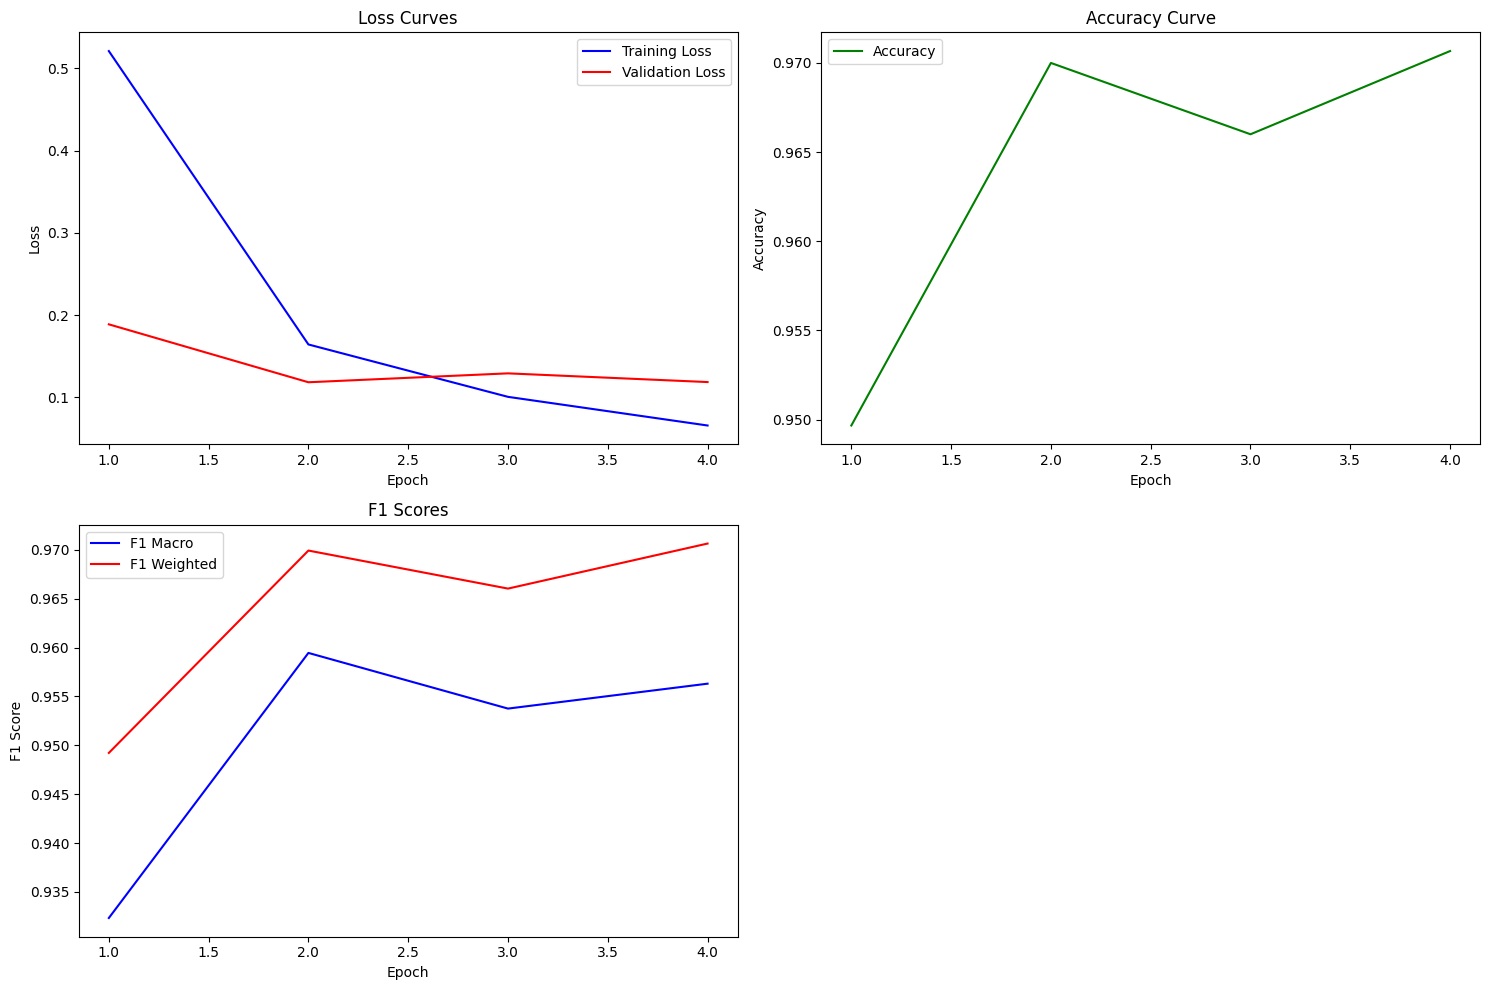

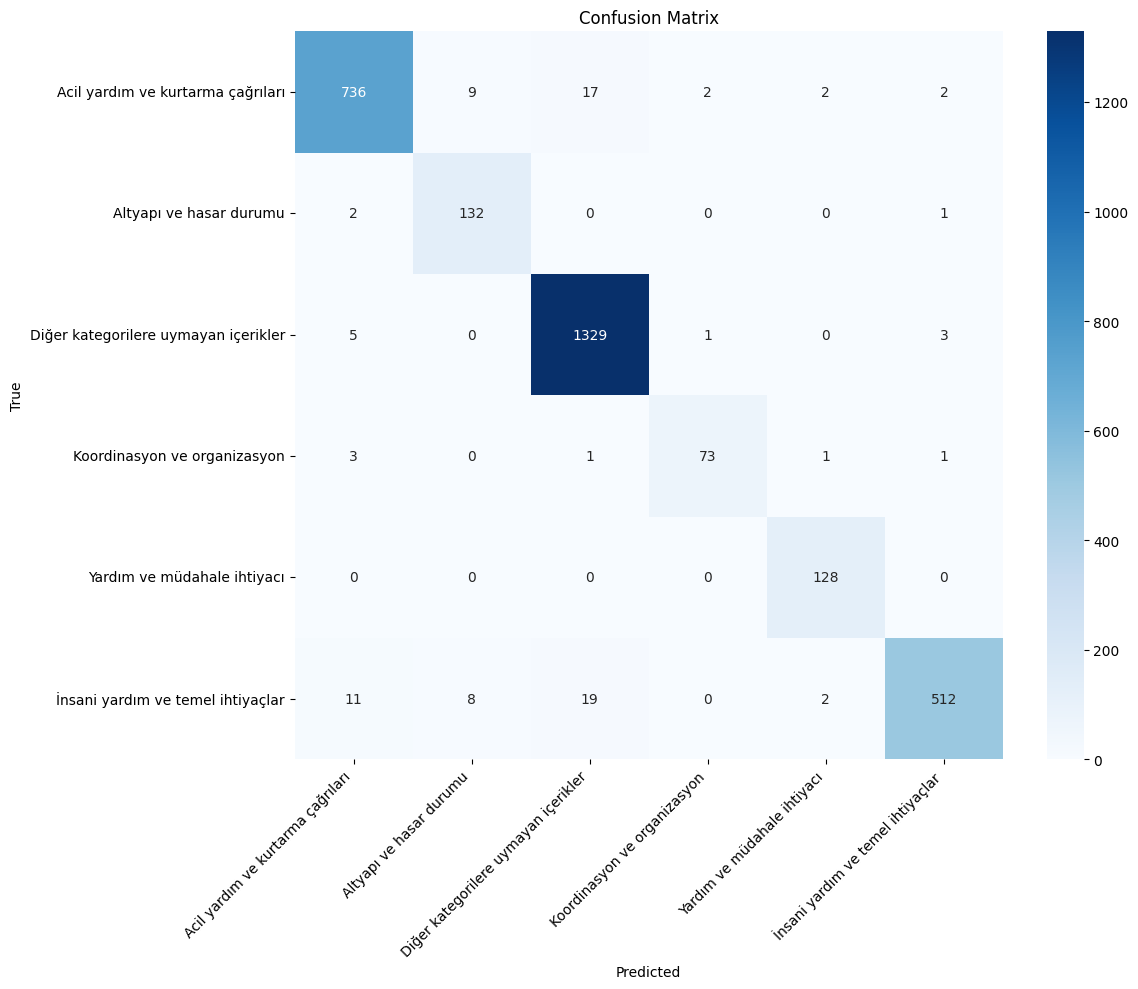

<Figure size 1500x600 with 0 Axes>

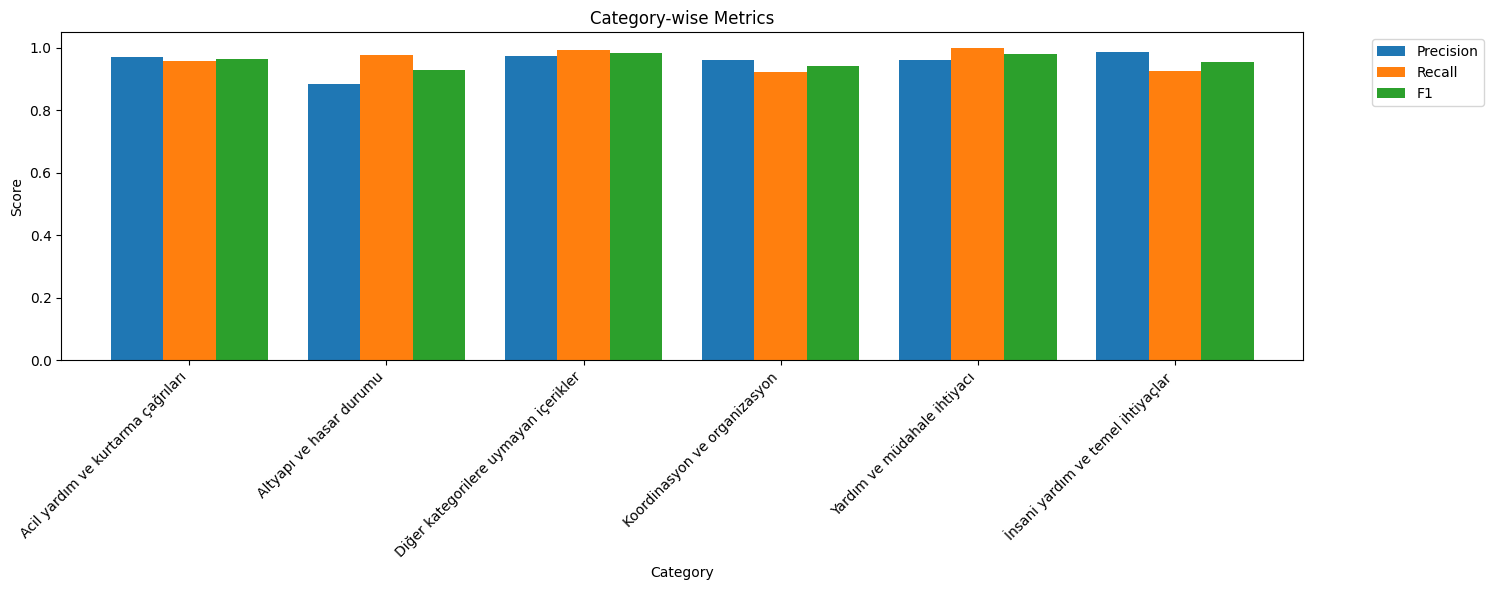

In [ ]:
class TweetDataset(Dataset):
    def __init__(self, tweets, labels, tokenizer, max_len=128):
        self.tweets = tweets
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, idx):
        tweet = str(self.tweets.iloc[idx])
        label = self.labels.iloc[idx]

        encoding = self.tokenizer.encode_plus(
            tweet,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

class ModelMetricsTracker:
    def __init__(self):
        self.epoch_metrics = []
        self.best_metrics = None
        self.timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        self.output_dir = f"model_analysis_{self.timestamp}"
        os.makedirs(self.output_dir, exist_ok=True)

    def add_epoch_metrics(self, epoch, metrics):
        metrics['epoch'] = epoch
        self.epoch_metrics.append(metrics)

    def update_best_metrics(self, metrics):
        if self.best_metrics is None or metrics['val_loss'] < self.best_metrics['val_loss']:
            self.best_metrics = metrics

    def save_metrics(self):
        # Epoch metrikleri
        df_epochs = pd.DataFrame(self.epoch_metrics)
        df_epochs.to_csv(f"{self.output_dir}/epoch_metrics.csv", index=False)

        # En iyi metrikler
        if self.best_metrics:
            df_best = pd.DataFrame([self.best_metrics])
            df_best.to_csv(f"{self.output_dir}/best_metrics.csv", index=False)

    def plot_training_curves(self):
        df = pd.DataFrame(self.epoch_metrics)

        plt.figure(figsize=(15, 10))

        # Loss grafiği
        plt.subplot(2, 2, 1)
        plt.plot(df['epoch'], df['train_loss'], 'b-', label='Training Loss')
        plt.plot(df['epoch'], df['val_loss'], 'r-', label='Validation Loss')
        plt.title('Loss Curves')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # Accuracy grafiği
        plt.subplot(2, 2, 2)
        plt.plot(df['epoch'], df['accuracy'], 'g-', label='Accuracy')
        plt.title('Accuracy Curve')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        # F1 skorları
        plt.subplot(2, 2, 3)
        plt.plot(df['epoch'], df['f1_macro'], 'b-', label='F1 Macro')
        plt.plot(df['epoch'], df['f1_weighted'], 'r-', label='F1 Weighted')
        plt.title('F1 Scores')
        plt.xlabel('Epoch')
        plt.ylabel('F1 Score')
        plt.legend()

        plt.tight_layout()
        plt.savefig(f"{self.output_dir}/training_curves.png")
        plt.show()

class TransformerTweetClassifier:
    def __init__(self, model_name='dbmdz/bert-base-turkish-uncased', learning_rate=2e-5):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")

        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForSequenceClassification.from_pretrained(
            model_name,
            num_labels=6,
            problem_type="single_label_classification"
        ).to(self.device)

        self.optimizer = torch.optim.AdamW(self.model.parameters(), lr=learning_rate)
        self.label_encoder = LabelEncoder()
        self.metrics_tracker = ModelMetricsTracker()

        self.categories = [
            "Acil yardım ve kurtarma çağrıları",
            "Yardım ve müdahale ihtiyacı",
            "İnsani yardım ve temel ihtiyaçlar",
            "Altyapı ve hasar durumu",
            "Koordinasyon ve organizasyon",
            "Diğer kategorilere uymayan içerikler"
        ]

    def plot_confusion_matrix(self, y_true, y_pred, categories):
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(12, 10))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=categories, yticklabels=categories)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.savefig(f"{self.metrics_tracker.output_dir}/confusion_matrix.png")
        plt.show()

    def plot_category_metrics(self, y_true, y_pred, categories):
        precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred)

        metrics_df = pd.DataFrame({
            'Category': categories,
            'Precision': precision,
            'Recall': recall,
            'F1': f1,
            'Support': support
        })

        plt.figure(figsize=(15, 6))

        # Precision, Recall, F1 grafiği
        metrics_df.plot(x='Category', y=['Precision', 'Recall', 'F1'],
                       kind='bar', width=0.8, figsize=(15, 6))
        plt.title('Category-wise Metrics')
        plt.xlabel('Category')
        plt.ylabel('Score')
        plt.xticks(rotation=45, ha='right')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f"{self.metrics_tracker.output_dir}/category_metrics.png")
        plt.show()

        # Metrikleri kaydet
        metrics_df.to_csv(f"{self.metrics_tracker.output_dir}/category_metrics.csv", index=False)

    def evaluate_epoch(self, val_loader, epoch):
        self.model.eval()
        val_loss = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                outputs = self.model(
                    input_ids,
                    attention_mask=attention_mask,
                    labels=labels
                )

                val_loss += outputs.loss.item()
                predictions = torch.argmax(outputs.logits, dim=1)

                all_preds.extend(predictions.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        # Metrikleri hesapla
        avg_val_loss = val_loss / len(val_loader)
        accuracy = (np.array(all_preds) == np.array(all_labels)).mean()
        f1_macro = f1_score(all_labels, all_preds, average='macro')
        f1_weighted = f1_score(all_labels, all_preds, average='weighted')

        metrics = {
            'epoch': epoch,
            'val_loss': avg_val_loss,
            'accuracy': accuracy,
            'f1_macro': f1_macro,
            'f1_weighted': f1_weighted,
            'predictions': all_preds,
            'true_labels': all_labels
        }

        return metrics

    def train(self, train_data_path, epochs=4, batch_size=16):
        # Veriyi yükle ve hazırla
        df = pd.read_excel(train_data_path)
        df.dropna(subset=['Tweet', 'Kategori'], inplace=True)
        df['Kategori'] = df['Kategori'].map(lambda x: str(x).strip())
        df['encoded_labels'] = self.label_encoder.fit_transform(df['Kategori'])

        # Veri setini böl
        train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

        # DataLoader'ları oluştur
        train_dataset = TweetDataset(train_df['Tweet'], train_df['encoded_labels'], self.tokenizer)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        val_dataset = TweetDataset(val_df['Tweet'], val_df['encoded_labels'], self.tokenizer)
        val_loader = DataLoader(val_dataset, batch_size=batch_size)

        # Başlangıç analizi
        print("\nVeri Seti Analizi:")
        print(f"Toplam örnek sayısı: {len(df)}")
        print(f"Eğitim seti: {len(train_df)}")
        print(f"Doğrulama seti: {len(val_df)}")

        category_dist = df['Kategori'].value_counts()
        print("\nKategori Dağılımı:")
        print(category_dist)

        # Eğitim döngüsü
        for epoch in range(epochs):
            self.model.train()
            train_loss = 0

            # Eğitim
            progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs}')
            for batch in progress_bar:
                self.optimizer.zero_grad()

                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                outputs = self.model(
                    input_ids,
                    attention_mask=attention_mask,
                    labels=labels
                )

                loss = outputs.loss
                train_loss += loss.item()

                loss.backward()
                self.optimizer.step()

                # Progress bar güncelle
                progress_bar.set_postfix({'training_loss': f'{loss.item():.3f}'})

            avg_train_loss = train_loss / len(train_loader)

            # Değerlendirme
            eval_metrics = self.evaluate_epoch(val_loader, epoch + 1)
            eval_metrics['train_loss'] = avg_train_loss

            # Metrikleri kaydet ve göster
            self.metrics_tracker.add_epoch_metrics(epoch + 1, eval_metrics)

            print(f'\nEpoch {epoch + 1}:')
            print(f'Training Loss: {avg_train_loss:.4f}')
            print(f'Validation Loss: {eval_metrics["val_loss"]:.4f}')
            print(f'Accuracy: {eval_metrics["accuracy"]:.4f}')
            print(f'F1 Score (Macro): {eval_metrics["f1_macro"]:.4f}')
            print(f'F1 Score (Weighted): {eval_metrics["f1_weighted"]:.4f}')

            # En iyi modeli kaydet
            self.metrics_tracker.update_best_metrics(eval_metrics)
            if self.metrics_tracker.best_metrics == eval_metrics:
                torch.save(self.model, f"{self.metrics_tracker.output_dir}/best_model_full.pth")
                print("En iyi model kaydedildi.")


        # Eğitim sonrası analizler
        best_metrics = self.metrics_tracker.best_metrics

        print("\nEn İyi Model Metrikleri:")
        print(f"Best Validation Loss: {best_metrics['val_loss']:.4f}")
        print(f"Best Accuracy: {best_metrics['accuracy']:.4f}")
        print(f"Best F1 Score (Macro): {best_metrics['f1_macro']:.4f}")
        print(f"Best F1 Score (Weighted): {best_metrics['f1_weighted']:.4f}")

        # Detaylı sınıflandırma raporu
        print("\nDetaylı Sınıflandırma Raporu:")
        print(classification_report(best_metrics['true_labels'],
                                 best_metrics['predictions'],
                                 target_names=self.label_encoder.classes_))

        # Görselleştirmeler
        self.metrics_tracker.plot_training_curves()
        self.plot_confusion_matrix(best_metrics['true_labels'],
                                 best_metrics['predictions'],
                                 self.label_encoder.classes_)
        self.plot_category_metrics(best_metrics['true_labels'],
                                 best_metrics['predictions'],
                                 self.label_encoder.classes_)

        # Tüm metrikleri kaydet
        self.metrics_tracker.save_metrics()

if __name__ == "__main__":
    try:
        classifier = TransformerTweetClassifier()
        train_data_path = 'categorized_tweets7.xlsx'
        classifier.train(train_data_path, epochs=4, batch_size=16)
    except Exception as e:
        print(f"Hata oluştu: {str(e)}")

In [ ]:
import shutil

# Klasörü zip dosyasına dönüştür
shutil.make_archive("/content/model_analysis_20250112_171255", "zip", "/content/model_analysis_20250112_171255")



'/content/model_analysis_20250112_171255.zip'

In [ ]:
class TweetPredictor:
    def __init__(self, model_path, model_name='dbmdz/bert-base-turkish-uncased'):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")

        # Model ve tokenizer'ı yükle
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForSequenceClassification.from_pretrained(
            model_name,
            num_labels=6,
            problem_type="single_label_classification"
        ).to(self.device)

        # Eğitilmiş model ağırlıklarını yükle
        # Load the entire model
        loaded_model = torch.load(model_path, map_location=self.device)
        # If loaded_model is an instance of BertForSequenceClassification,
        # use it directly
        if isinstance(loaded_model, type(self.model)):
            self.model = loaded_model
        # Otherwise, it's likely a state_dict, so load as before
        else:
            self.model.load_state_dict(loaded_model)
        self.model.eval()

        self.categories = [
            "Acil yardım ve kurtarma çağrıları",
            "Yardım ve müdahale ihtiyacı",
            "İnsani yardım ve temel ihtiyaçlar",
            "Altyapı ve hasar durumu",
            "Koordinasyon ve organizasyon",
            "Diğer kategorilere uymayan içerikler"
        ]

    def predict_batch(self, texts, batch_size=32):
        dataset = TweetDataset(pd.Series(texts), pd.Series([0]*len(texts)), self.tokenizer)
        dataloader = DataLoader(dataset, batch_size=batch_size)

        predictions = []
        prediction_probs = []

        with torch.no_grad():
            for batch in tqdm(dataloader, desc="Predicting"):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)

                outputs = self.model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                probs = torch.softmax(logits, dim=1)

                preds = torch.argmax(logits, dim=1)

                predictions.extend(preds.cpu().numpy())
                prediction_probs.extend(probs.cpu().numpy())

        return predictions, prediction_probs

    def predict_categories(self, csv_path, text_column='Tweet', batch_size=32):
        # CSV dosyasını oku
        df = pd.read_csv(csv_path)
        texts = df[text_column].astype(str).tolist()

        # Tahminleri yap
        predictions, prediction_probs = self.predict_batch(texts, batch_size)

        # Sonuçları DataFrame'e ekle
        df['predicted_category'] = [self.categories[pred] for pred in predictions]

        # Tahmin güvenlik skorlarını ekle
        confidence_scores = [max(probs) for probs in prediction_probs]
        df['prediction_confidence'] = confidence_scores

        # Sonuçları kaydet
        output_path = 'tweets_with_predictions.csv'
        df.to_csv(output_path, index=False)

        # Kategori dağılımını göster
        category_dist = df['predicted_category'].value_counts()
        print("\nTahmin Edilen Kategori Dağılımı:")
        print(category_dist)

        return df

# Kullanım örneği
def main():
    model_path = "/content/model_analysis_20250112_171255/best_model_full.pth"  # Gerçek model path'ini kullanın
    predictor = TweetPredictor(model_path)

    # Tahminleri yap
    predictions_df = predictor.predict_categories(
        csv_path='tweets_without_duplicates1.csv',
        text_column='Tweet',  # CSV'nizdeki tweet sütununun adını buraya yazın
        batch_size=32
    )

    print("\nTahminler tweets_with_predictions.csv dosyasına kaydedildi.")

if __name__ == "__main__":
    main()

Using device: cuda


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-15-3726da04f8ad>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_gl


Tahmin Edilen Kategori Dağılımı:
predicted_category
İnsani yardım ve temel ihtiyaçlar       166261
Acil yardım ve kurtarma çağrıları       117505
Diğer kategorilere uymayan içerikler     86523
Koordinasyon ve organizasyon             22230
Yardım ve müdahale ihtiyacı              16495
Altyapı ve hasar durumu                  10213
Name: count, dtype: int64

Tahminler tweets_with_predictions.csv dosyasına kaydedildi.


In [ ]:
import pandas as pd

# CSV dosyasının yolunu belirtin
csv_path = 'tweets_with_predictions.csv'  # Dosya adınızı buraya yazın

# CSV dosyasını oku
df = pd.read_csv(csv_path)

# Tweet sütunundaki toplam satır sayısını hesapla
tweet_column = 'Tweet'  # Tweet sütununuzun adı
tweet_count = df[tweet_column].dropna().shape[0]

print(f"CSV dosyasında toplam {tweet_count} tweet var.")


CSV dosyasında toplam 419227 tweet var.


In [ ]:
import zipfile

# CSV dosyasının adı
csv_filename = 'tweets_with_predictions.csv'

# ZIP dosyasının adı
zip_filename = 'tweets.zip'

# ZIP dosyasını oluştur ve CSV'yi ekle
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    zipf.write(csv_filename)

print(f"{zip_filename} oluşturuldu.")
